<div style="border:solid Chocolate 2px; padding: 40px">
Привет!👋
    

Меня зовут Андрей Саввин, я стал ревьюером твоего проекта)). Предлагаю перейти на 'ты', но если это неудобно, обязательно скажи об этом!

Пожалуйста не удаляй мои комментарии, они очень пригодятся для нашей работы в случае повторной проверки проекта.
    
Если у тебя появляются вопросы к моим комментариям, поставь под ними свои комментарии, лучше выделить их цветом или обозначить любым удобным тебе способом, главное чтобы твои комментарии визуально отличались от моих, тогда мы не запутаемся))

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!</b> 🏆: 
В случае, если решение на отдельном шаге является полностью правильным.

</div>


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации</b>🔎: В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.

</div>


<div class="alert alert-danger">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>
    
<b>На доработку</b>🤔: В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.


</div>

Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [65]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

pd.options.display.float_format = '{:,.1f}'.format

display(df_movies.sample(5))
display(df_shows.sample(15))


df_movies.info()
df_shows.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4281,Убийство .,211011810,2010-03-17T12:00:00.000Z,Художественный,Хрестинин К.О.,Россия,К.Хрестинин,"К.Хрестинин, Ж.Хрестинина",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.1,"триллер,детектив,драма"
6268,Лягушонок Риббит,124003618,2018-10-18T12:00:00.000Z,Анимационный,"Крест Энимейшн Студиос, Ка Эр У Студиос",Малайзия - США,Чак Пауэрс,"Ширин М.Хашим, Норман Абдул Халим, Юрси Крю",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,4.5,"мультфильм,комедия,приключения"
3088,Гордость и предубеждение и зомби,121003416,2016-02-15T12:00:00.000Z,Художественный,Лайонсгейт,США,Бёрр Стирс,"Марк Бутан, Шон МакКитрик",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.8,"ужасы,фэнтези,боевик"
7351,Новые времена,121031819,2019-11-01T12:00:00.000Z,Художественный,Чарльз Чаплин Филм Корпорэйшн,США,Чарльз Чаплин,Чарльз Чаплин,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.4,"драма,военный,биография"
3721,"Рождество, опять",121032816,2016-12-19T12:00:00.000Z,Художественный,"Фэктори 25, Инструм Интернэшнл Корпорейшн, Ок ...",США,Чарльз Покел,Чарльз Покел,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"драма,мелодрама"


,puNumber,box_office
2318,121027417,"32,327,724.5"
526,111011618,"988,413.0"
2457,121030318,"643,121,241.4"
2764,124002416,"513,784.0"
506,111011115,"9,200,824.5"
1583,121013210,130.0
895,114010018,"185,318,326.0"
2141,121024115,"2,151,825.5"
1614,121013719,"9,702,037.7"
2525,121032819,"6,121,824.0"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b> Некоторые замечания и рекомендации</b>🔎:

в датафрейме shows есть данные в неудобном экспоненциальном формате, чтобы это поправить, можешь использовать конструкцию:
    
    pd.options.display.float_format = '{:,.2f}'.format .

</div>

<div class="alert alert-block alert-info">А как для отдельных столбцов менять количество знаков? Наример, для всех сделать 2 знака после запятой, а для рейтинга 1. </div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b> Некоторые замечания и рекомендации</b>🔎:

pd.options.display.float_format определяет стиль отображения типа float для всей текущей сессии, если нужно отобразить именно определенное колличество знаков в разных столбцах, то его импользовать не стоит. Но можно импользовать конструкцию:

    df_shows['box_office'] = df_shows['box_office'].apply("{0:.1f}".format)
она будет отображать корректно, но в формате str, если нужен снова формат float, то нужно добавить к ней .astype('float')
    

Объединим таблицы по столбцу `puNumber` - номер прокатного удостоверения. Для начала эти слобцы в двух таблицах нужно привести к одинаковому типу данных.

В таблице `df_movies` столбец `puNumber` имеет тип object. Проверим, что в нем только числа и заменим по необходимости другие значения.

In [66]:
#ищем не числа в столбце
df_movies[~df_movies['puNumber'].str.isnumeric()]['puNumber']

804      111004112
1797           нет
Name: puNumber, dtype: object

In [124]:
# заменим едиснтвенное не числовое значение на 0
df_movies.loc[df_movies['puNumber'] == 'нет', 'puNumber'] = 0

# меняем тип данных с столбце puNumber
df_movies['puNumber'] = df_movies['puNumber'].astype('int')

#соединяем таблицы
df = df_movies.merge(df_shows, on='puNumber', how='outer')

df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
129,Дикий мед,111011014,2014-10-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Владимир Чеботарев,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама",NaN
6128,Род,111014218,2018-08-19T12:00:00.000Z,Художественный,Нелидова Элен Дмитриевна,Россия,Э.Нелидова,"О.Хлопунова, Э.Нелидова",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"комедия,драма",NaN
1134,Молодые сердца,121019112,2012-08-10T12:00:00.000Z,Художественный,"Дип Блю Пикчерз, Ред 56, Олсон Интертейнмент",США,Дэнни Муни,Чип Диггенс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.2,"драма,мелодрама,военный",NaN
2160,Kinematic Shorts: Spring. Shorts. Fun. Програм...,121005815,2015-03-25T12:00:00.000Z,Художественный,"Поларис Филм Продакшн энд Финанс, Белив Медиа,...",Великобритания - Франция - Республика Кипр - Ш...,"Тибо Дуран, Даина Пападаки, Пьер Амстудс Рох, ...","Фил Барнс, Кэмпбелл Битон, Павел Вукович, Тать...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,Вождь Разнокожих,111002512,2012-04-13T12:00:00.000Z,Художественный,"ООО ""Рекун-синема""",Россия,Е.Анашкин,"И.Неретин, Д.Куликов, Т.Сергейцев",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.6,"комедия,семейный","1,070.0"


Мы успешно объединили две таблицы в одну.

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  1 Все отлично!</b> 🏆: 
   
Все верно, данные загружены, таблицы обьеденены верно.
    
</div>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В некоторых столбцах типы данных логичнее заменить на другие. Даты заменим на явный тип datetime64. Значения, которые не могут быть дробными, на int. Среди них:
* `show_start_date` - сделать datetime64
* `ratings` - сделать float (от 0.0 до 10.0)

Менять тип данных в `refundable_support`, `nonrefundable_support`, `budget`, `box_office` не будем, потому что для удобной работы со столбцами достаточно выводить значения без запятой. А вот чтобы сделать int нужно заполнить пропуски, которые в данном случае лучше оставить. О целесообразности сохранении этих пропусков будет далее.

Еще удобнее сделать отдельный столбец `age_restriction_int` на основании `age_restriction` типа int. Вместо большой фразы там будет только число - возраст ограничения. 

In [69]:
# приводим к типу datetime64
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

# округляем до ближайшего значения с шагом в один день
df['show_start_date'] = df['show_start_date'].dt.tz_convert(None).dt.round('1d')

# float значения refundable_support, nonrefundable_support, budget, box_office выведем без запятой
for column in ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']:
    df[column] = round(df[column])

df.sample(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6106,Альфа,121016718,2018-08-23,Художественный,Студио 8,США,Альберт Хьюз,Эндрю Рона,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,"боевик,драма,приключения","548,216,763.0"
7286,Гемини,121029219,2019-10-11,Художественный,"Скайденс Медиа, Джерри Брукхаймер Филмз, Фосоу...",КНР - США,Энг Ли,"Джерри Брукхаймер, Дэна Голдберг, Дэвид Эллисон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"боевик,фантастика","267,748,809.0"
2318,Любовь в словах и картинах,121023314,2014-10-11,Художественный,"Летитюд Продакшнз, Ласко Филмз",США,Фред Скеписи,"Кертис Берч, Джералд Ди Пего, Фред Скеписи",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"драма,мелодрама,комедия",NaN
6616,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,111026518,2019-01-22,Художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Сазонов, Е.Климович, А.Коломеец, С.Черникова...","Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,98%,"фантастика,боевик",NaN
2871,Лунный флаг,124000516,2016-02-29,Анимационный,"Лайтбокс Интертейнмент, Телефоника Студиос, 4 ...",Испания,Энрике Гато,"Альваро Аугустин, Хорди Гасуль",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мультфильм,фантастика,комедия","24,984,169.0"
4256,Шевели ластами 3D,124000910,2010-07-30,Анимационный,"Нью Вейв Пикчерз, Иллюмината Пикчерз, Моушн Ин...",США-Бельгия,Бен Стассен,"Джина Галло, Мими Майнард, Доминик Парис",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мультфильм,приключения,семейный","1,010.0"
5086,"Революция, я люблю тебя",121005911,2011-04-14,Художественный,"Канана Филмс, Институто Мехикано де Синематогр...",Мексика,"Марианна Ченильо, Фернандо Эймбке, Амат Эскала...","Пабло Круз, Филипе Гарсия Нараньо, Джонатан Ма...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"военный,история",NaN
5921,Глубокие реки,111007518,2018-06-06,Художественный,"НФ ""Пример интонации (Фонд Александра Сокурова)""",Россия,В.Битоков,Н.Янкин,«16+» - для детей старше 16 лет,0.0,"25,000,000.0","37,765,654.0",Министерство культуры,6.5,драма,"2,188,742.0"
2635,Хитмэн: Агент 47,121016415,2015-08-01,Художественный,"ХХ век Фокс, Тэ Эс Гэ Интертейнмент, Инфините ...",США - Германия,Александр Бах,"Адриан Аскариа, Чарльз Гордон, Алекс Янг",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"боевик,фантастика,триллер","214,412,031.0"
2926,Любовь не по размеру,121009816,2016-04-25,Художественный,"Креатив Андина, Гомон, Скоп Инвест",Франция,Лоран Тирар,"Сидони Дюма, Ванесса ван Зюлен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,комедия,"35,175,924.0"


Сделали столбец с датой читаемым. Теперь приведем рейтинг в столбце `ratings` к единому стилю. Сейчас там рейтинг и в виде дробей, и в виде процентов. Сделаем рейтинг в виде дробного числа от 0.0 до 10.0.

In [70]:
df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
64%      1
62%      1
28%      1
19%      1
1.2      1
Name: ratings, Length: 94, dtype: int64

In [71]:
# функция, которая преобразовывает проценты в рейтинг от 0.0 до 10.0

def persent_to_float(ratings):
    try:
        if "%" in ratings:
            return int(ratings[:-1]) / 10
        else:
            return ratings
            
    except:
        return ratings
    
# применим ее к столбцу ratings
df['ratings'] = df['ratings'].apply(persent_to_float)
df['ratings'] = df['ratings'].astype('float')

df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    244
      ... 
1.8      1
9.2      1
1.2      1
1.0      1
1.3      1
Name: ratings, Length: 84, dtype: int64

In [72]:
df.sample(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5270,Ёлки - 2,111008311,2011-11-22,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Котт, А.Баранов, Л.Габриадзе",А.Ремизова,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия,семейный","5,141.0"
6114,22 мили,121017318,2018-08-23,Художественный,"Эс Ти Икс Интертейнмент, Клосест То зе Хол Про...",США,Питер Берг,Питер Берг,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.9,"боевик,триллер","37,448,541.0"
1162,Выйти замуж за два дня,121029912,2012-12-06,Художественный,"Куад Продюксьон, ТФ1 Фильм Продюксьон, Скоуп П...",Франция,Паскаль Шомель,"Николас Дювал-Адассовский, Лорен Зейтун, Ян Зеноу",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"мелодрама,комедия",NaN
5352,Лара Крофт - расхитительница гробниц: Колыбель...,221116810,2010-10-12,Художественный,"Парамаунт Пикчерз, Мьючуал Филм Компани, Би-Би...",США-Япония-Германия-Великобритания-Нидерланды,Йен Де Бонт,"Лоуренс Гордон, Ллойд Левин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,"фэнтези,боевик,приключения",NaN
5991,Анна Каренина. Мюзикл,111010118,2018-09-12,Художественный,Волт Интернешнл Продакшнз,Россия,Е.Шин,"А.Болонин, В.Тартаковский",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"мюзикл,мелодрама",NaN
311,Фара,211040615,2015-09-10,Художественный,"ЗАО Студия ""Эй-Би-Эй"", Национальный продюсерск...",Россия - Казахстан,А.Карпыков,Б.Айрапетян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.6,"триллер,драма",NaN
6860,Спасатели,124002219,2019-04-22,Анимационный,ДжиДиСи Интернэшнл Лимитед,Китай,"Шэнь Юй, Хуан Янь",Сяо Юн,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.8,"боевик,комедия,криминал","947,288.0"
825,Бобби Фишер против всего мира,122000412,2012-06-15,Документальный,Мокси Файеркрекер/ НВО Докьюментари Филмз/ ЛМ ...,США-Великобритания-Ирландия,Лиз Гарбус,"Рори Кеннеди, Стэнли Ф. Бушталь, Лиз Гарбус",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"документальный,биография,история",NaN
2844,Хичкок/Трюффо,126001316,2016-03-16,Прочие,"Арт Франс, Артлайн Филмз, Коэн Медиа Групп",Франция - США,Кент Джонс,"Чарльз С.Коэн, Оливье Милле",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,"драма,биография,история","1,017,546.0"
4014,Кукарача 3D,114000111,2011-03-11,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,А.Адилханян,Г.Нерсисян,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.3,"мультфильм,комедия",NaN


<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  Все отлично!</b> 🏆: 
   
Хорошая и локаничная функция для преведения в 10-бальную шкалу
    
</div>

Получилось, привели `rating` к единому формату. Осталось сделать столбец `age_restriction_category` с категориями возрастных ограничений. Там будет только цифра ограничения. Дополнительный текст уберем, тип столбца будет int.  

In [73]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [74]:

# функция, которая выделяет число из строки
def age_restriction_to_num(age_restriction):
    match =re.findall('\d+', age_restriction)
    return int(match[0])

#применим функцию к столбцу total_income и сохраним выводы в total_income_category
df['age_restriction_category'] = df['age_restriction'].apply(age_restriction_to_num)

df['age_restriction_category'].value_counts()

16    2851
18    1605
12    1593
0      811
6      626
Name: age_restriction_category, dtype: int64

<div class="alert alert-danger">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>
    
<b> На доработку</b>🤔: 
    
забыт импорт re
    
Но здесь совсем не обязательно менять этот столбец на целочисленные значения, разве что только для экономия места.

Но + если изначально замысел был именно экономия места, и за использование этой библиотеки

<div class="alert alert-block alert-info">Добавила</div>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     7486 non-null   object        
 1   puNumber                  7486 non-null   int64         
 2   show_start_date           7486 non-null   datetime64[ns]
 3   type                      7486 non-null   object        
 4   film_studio               7468 non-null   object        
 5   production_country        7484 non-null   object        
 6   director                  7477 non-null   object        
 7   producer                  6918 non-null   object        
 8   age_restriction           7486 non-null   object        
 9   refundable_support        332 non-null    float64       
 10  nonrefundable_support     332 non-null    float64       
 11  budget                    332 non-null    float64       
 12  financing_source    

Успешно сделали столбец с числом ограничения по возрасту. С ним будет удобнее работать, ведь он имеет тип int и значения в нем короче. 

Закончили править типы данных.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Столбцы, где есть пропущенные значения:
* `director` - режиссёр
* `producer` - продюсер
* `film_studio` -  студия-производитель
* `production_country` - страна-производитель
* `refundable_support` - объём возвратных средств государственной поддержки
* `nonrefundable_support` - объём невозвратных средств государственной поддержки
* `budget` - общий бюджет фильма
* `financing_source` - источник государственного финансирования
* `ratings` - рейтинг фильма на КиноПоиске
* `genres` - жанр фильма
* `box_office` - сборы в рублях

Заполним пропуски в `director`, `producer`, `genres`, `film_studio` на "unknown".

Пропуски в `financing_source` означают отсутствие источника государственного финансирования. Заменим пропуски на "no_support".

Пропуски в `refundable_support`, `nonrefundable_support` заполнять не будем. Вероятно, это означает отсутствие государственного финансирования. Но заполнять их 0 нет нужды, в вычислениях не поможет, но может запутать. Так же это бы исказило показатели вроде среднего, квартилей.

Пропуски в `box_office` образовались при соединении outer двух таблиц. Такие пропуски не получится ничем заполнить, не будем их трогать.

Пропуски в `budget`, `ratings` так же не будем заполнять. Заполнять их средними значениями или 0 не корректно. Оставим как есть.

In [76]:
# замена пропусков в director, producer, genres, film_studio, production_country на 'unknown'
for column in ['director', 'producer', 'genres', 'film_studio', 'production_country']:
    df[column] = df[column].fillna('unknown')

# замена пропусков в refundable_support на 'no_support'
df['financing_source'] = df['financing_source'].fillna('no_support')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     7486 non-null   object        
 1   puNumber                  7486 non-null   int64         
 2   show_start_date           7486 non-null   datetime64[ns]
 3   type                      7486 non-null   object        
 4   film_studio               7486 non-null   object        
 5   production_country        7486 non-null   object        
 6   director                  7486 non-null   object        
 7   producer                  7486 non-null   object        
 8   age_restriction           7486 non-null   object        
 9   refundable_support        332 non-null    float64       
 10  nonrefundable_support     332 non-null    float64       
 11  budget                    332 non-null    float64       
 12  financing_source    

С пропусками закончили - заполнили там, где можно.

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  Все отлично!</b> 🏆: 
   
Пропуски заполнены корректно.
    
</div>

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [77]:
df.duplicated().sum()

0

Явных дубликатов нет. Проверим еще столбцы, где должны быть уникальные значения - `puNumber` и `title`.

In [78]:
for column in ['puNumber', 'title']:
    print(df[column].duplicated().sum())

2
714


В таблице 2 дубликата `puNumber` и 714 дубликатов `title`. Выведем их.

In [79]:
df[df['title'].duplicated() == True]['title'].value_counts()

День святого Валентина_                                                                                                        4
Двойной копец                                                                                                                  3
Кошмар на улице Вязов /Фильм ужасов/                                                                                           3
Кошки против собак: Месть Китти Галор                                                                                          3
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/                                                                    3
                                                                                                                              ..
Вечное возвращение.                                                                                                            1
Властелин колец: Возвращение короля /По произведению Джона Рональда Руэла Толкиена "Властелин кол

In [80]:
df[df['puNumber'].duplicated() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.6,"драма,мелодрама,история",NaN,16
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,no_support,6.8,"комедия,криминал",NaN,12


In [81]:
df[df['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.0,"мелодрама,комедия",NaN,16
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.6,"драма,мелодрама,история",NaN,16


В этих фильмах одинаковый `puNumber`, но в этих строках информация о разных фильмах.

In [82]:
df[df['title'] == 'Как жениться и остаться холостым']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
4520,Как жениться и остаться холостым,221142510,2010-12-03,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.0,"мелодрама,комедия",NaN,16
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.0,"мелодрама,комедия",NaN,16


In [83]:
df[df['puNumber'] == 221142510]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
4520,Как жениться и остаться холостым,221142510,2010-12-03,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.0,"мелодрама,комедия",NaN,16


Зато у первого фильма две записи с разными `puNumber`. Оставим запись с уникальным `puNumber` и удалим с повторяющимся.

In [84]:
df = df.drop(df[(df['puNumber'] == 221154310) & (df['title'] == 'Как жениться и остаться холостым')].index)

df[df['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.6,"драма,мелодрама,история",NaN,16


Отлично, мы удалили дубликаты для первого `puNumber`. Разберемся со вторым.

In [85]:
df[df['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.4,"комедия,криминал",NaN,16
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,no_support,6.8,"комедия,криминал",NaN,12


А вот здесь одинаковый `puNumber` у строк с информацией об одном и том же фильме. На кинопоиске у этого фильма рейтинг 7.4 и возрастное ограничение 16+. То есть первая запись правдивая, а вторую удалим.

In [86]:
df = df.drop(df[(df['puNumber'] == 221054410) & (df['age_restriction_category'] == 12)].index)

In [87]:
df['puNumber'].duplicated().sum()

0

Теперь в `puNumber` только уникальные значения. Осталось еще разобраться с 714 дубликатами title. Отсортируем по box_office, чтобы попробовать сохранить значения сборов.

In [88]:
df = df.sort_values(
    by = 'box_office',
    ascending = False,
    ).drop_duplicates(
    subset = ['title'])
for column in ['puNumber', 'title']:
    print(df[column].duplicated().sum())

0
0


Готово, мы избавились от явных дубликатов в столбцах `title` и `puNumber`, в которых должны быть уникальные значения.

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  Все отлично!</b> 🏆: 
   
Отлично, сделана проверка как на полные дубликат так и на дублирующиеся значения в столбцах title и puNumber. Обработка найденных дубликатов так же выполнена корректно.
    
</div>

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Посмотрим на категориальные столбцы:
* `type` - тип фильма
* `director` - режиссёр
* `producer` - продюсер
* `film_studio` -  студия-производитель
* `production_country` - страна-производитель
* `financing_source` - источник государственного финансирования
* `genres` - жанр фильма

In [89]:
for column in ['type', 'director', 'producer', 'film_studio', 'production_country', 'financing_source', 'genres']:
    print(df.sort_values(by = column)[column].unique().tolist())
    print('-------------------------------')

[' Анимационный', ' Художественный', 'Анимационный', 'Документальный', 'Музыкально-развлекательный', 'Научно-популярный', 'Прочие', 'Художественный']
-------------------------------
[' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ' Т.Саакян', 'unknown', 'Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', 'А. Калюжный', 'А. Кутерье', 'А.А.Эшпай', 'А.Аббасов', 'А.Абидова (псевдоним Аниса Сабири)', 'А.Аболс', 'А.Агаджанян', 'А.Адилханян', 'А.Адраникян', 'А.Аксененко', 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)', 'А.Алов, В.Наумов', 'А.Аманшаев, Г.Шенгелия', 'А.Амбросьев', 'А.Амиров', 'А.Ананикян, В.Рейнгеверц', 'А.Андрианов', 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ', 'А.Анненский', 'А.Аравин', 'А.Аравин, А.Прошкин', 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев', 'А.Артамонова', 'А.Арутюнов', 'А.Арутюнян, А.Коршунов', 'А.Атанесян', 'А.Бадягина', 'А.

Сразу видно, что в некоторых столбцах есть неявные дубликаты из-за добавления пробела в начале строки. Удалим их сразу по всем столбцам.

Еще видно, что в production_country некоторые страны разделены запятой, а некоторые дефисом. Приведем все к одному формату.

In [90]:
for column in ['type', 'director', 'producer', 'film_studio', 'production_country', 'financing_source', 'genres']:
    print('----', column, '---------------------------')
    df[column] = df[column].str.strip()
    print(df.sort_values(by = column)[column].unique().tolist())
    
df['production_country'] = df['production_country'].str.replace(', ','-')

---- type ---------------------------
['Анимационный', 'Документальный', 'Музыкально-развлекательный', 'Научно-популярный', 'Прочие', 'Художественный']
---- director ---------------------------
['unknown', 'Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', 'А. Калюжный', 'А. Кутерье', 'А.А.Эшпай', 'А.Аббасов', 'А.Абидова (псевдоним Аниса Сабири)', 'А.Аболс', 'А.Агаджанян', 'А.Адилханян', 'А.Адраникян', 'А.Аксененко', 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)', 'А.Алов, В.Наумов', 'А.Аманшаев, Г.Шенгелия', 'А.Амбросьев', 'А.Амиров', 'А.Ананикян, В.Рейнгеверц', 'А.Андрианов', 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано', 'А.Анненский', 'А.Аравин', 'А.Аравин, А.Прошкин', 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев', 'А.Артамонова', 'А.Арутюнов', 'А.Арутюнян, А.Коршунов', 'А.Атанесян', 'А.Бадягина', 'А.Бажанов', 'А.Балабанов', 'А.Балахонов', 'А.Бальчев', 'А.

Так же видно, что в `director` разное количество пробелов после запятой. А в `genres` наоборот нет пробелов после запятой. Приведем разделители в этих столбцах к одному виду - запятая с одним пробелом. Это нам потом пригодится.

In [91]:
df['director'] = df['director'].str.replace(',   ',',')
df['director'] = df['director'].str.replace(',  ',',')
df['director'] = df['director'].str.replace(', ',',')
df['director'] = df['director'].str.replace(',',', ')

df['genres'] = df['genres'].str.replace(',',', ')
    
print(df.sort_values(by = 'director')['director'].unique().tolist())
print(df.sort_values(by = 'genres')['genres'].unique().tolist())

['unknown', 'Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', 'А. Калюжный', 'А. Кутерье', 'А.А.Эшпай', 'А.Аббасов', 'А.Абидова (псевдоним Аниса Сабири)', 'А.Аболс', 'А.Агаджанян', 'А.Адилханян', 'А.Адраникян', 'А.Аксененко', 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)', 'А.Алов, В.Наумов', 'А.Аманшаев, Г.Шенгелия', 'А.Амбросьев', 'А.Амиров', 'А.Ананикян, В.Рейнгеверц', 'А.Андрианов', 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста, Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано', 'А.Анненский', 'А.Аравин', 'А.Аравин, А.Прошкин', 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс, Лу Хаму-Лхад, П.Осборн, Т.Ушев', 'А.Артамонова', 'А.Арутюнов', 'А.Арутюнян, А.Коршунов', 'А.Атанесян', 'А.Бадягина', 'А.Бажанов', 'А.Балабанов', 'А.Балахонов', 'А.Бальчев', 'А.Баранов', 'А.Баршак', 'А.Барщевский, И.Матвеев', 'А.Барыкин', 'А.Басаев', 'А.Басов', 'А.Безрук', 'А.Беляев', 'А.Берденников', 'А.Бзаров', 'А.Бильжо', 'А.Бобров', 'А.Бобровский', 'А.Богатырев', 'А.

Причинами неявных дубликатов могут являться парсинг из разных источников и ошибки людей, которые заносили эти данные.

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  Все отлично!</b> 🏆: 
   
Все неявные дубликаты выявлены и обработаны. + за вывод о характере их появления 
    
    
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Изучим значения в количественных столбцах:
* `refundable_support` - объём возвратных средств государственной поддержки
* `nonrefundable_support` - объём невозвратных средств государственной поддержки
* `budget` - общий бюджет фильма
* `box_office` -  сборы в рублях
* `ratings` - рейтинг фильма на КиноПоиске

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6771 entries, 7456 to 7485
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     6771 non-null   object        
 1   puNumber                  6771 non-null   int64         
 2   show_start_date           6771 non-null   datetime64[ns]
 3   type                      6771 non-null   object        
 4   film_studio               6771 non-null   object        
 5   production_country        6771 non-null   object        
 6   director                  6771 non-null   object        
 7   producer                  6771 non-null   object        
 8   age_restriction           6771 non-null   object        
 9   refundable_support        331 non-null    float64       
 10  nonrefundable_support     331 non-null    float64       
 11  budget                    331 non-null    float64       
 12  financing_source 

In [93]:
df[(df['budget'].isna() == False) | (df['refundable_support'].isna() == False) | (df['nonrefundable_support'].isna() == False)]['production_country'].value_counts()

Россия                                    315
Россия-Германия                             2
Россия-Италия                               2
Россия-Словакия-Чехия                       1
Россия-Китай                                1
Россия-Украина-Польша                       1
Россия-Франция-Латвия                       1
Россия - Грузия                             1
Россия-Украина                              1
Россия-Армения                              1
Россия-Германия-Великобритания              1
Россия-Германия-Казахстан-Польша-Китай      1
Россия-Латвия-Чешская Республика            1
Россия-Бельгия-Финляндия                    1
Россия-Сербия                               1
Name: production_country, dtype: int64

In [94]:
df[(df['budget'].isna() == False) & (df['refundable_support'].isna() == False) & (df['nonrefundable_support'].isna() == False)]['production_country'].value_counts()

Россия                                    315
Россия-Германия                             2
Россия-Италия                               2
Россия-Словакия-Чехия                       1
Россия-Китай                                1
Россия-Украина-Польша                       1
Россия-Франция-Латвия                       1
Россия - Грузия                             1
Россия-Украина                              1
Россия-Армения                              1
Россия-Германия-Великобритания              1
Россия-Германия-Казахстан-Польша-Китай      1
Россия-Латвия-Чешская Республика            1
Россия-Бельгия-Финляндия                    1
Россия-Сербия                               1
Name: production_country, dtype: int64

Значения в `refundable_support`, `nonrefundable_support`, `budget` есть только для некоторых российских фильмов, не для всех. Но, когда есть, присутcвуют все трое в строке. То есть бюджет у нас известен только для фильмов с государственным финансированием.

In [95]:
df[df['budget'].isna() == False].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category
7456,Холоп,111021719,2019-12-20,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.0","35,000,000.0","160,000,000.0",Фонд кино,6.8,комедия,"3,073,568,691.0",12
5653,Движение вверх,111011817,2017-12-22,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,"400,000,000.0","590,192,191.0",Фонд кино,7.5,"спорт, драма","2,779,686,144.0",6
6549,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.0","120,000,000.0","563,784,717.0",Фонд кино,6.5,"драма, военный, боевик","2,271,754,005.0",12
5505,Последний богатырь,111007017,2017-10-19,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,"50,000,000.0","50,000,000.0","352,477,575.0",Фонд кино,6.8,"комедия, фэнтези, приключения","1,655,037,688.0",12
5708,Лёд,111000518,2018-02-02,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,"25,000,000.0","60,000,000.0","148,585,222.0",Фонд кино,NaN,unknown,"1,445,731,798.0",12


count             331.0
mean      124,762,132.7
std       183,427,559.9
min                 0.0
25%        42,000,000.0
50%        68,490,606.0
75%       140,015,119.0
max     2,305,074,303.0
Name: budget, dtype: float64

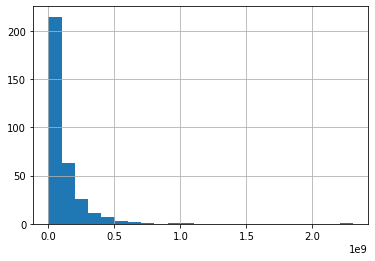

<AxesSubplot:>

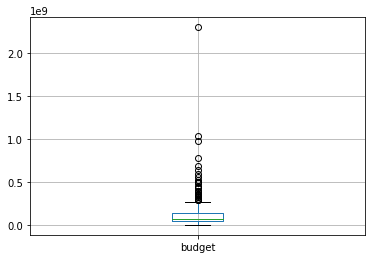

In [96]:
display(df['budget'].describe())
df['budget'].hist(bins = 23)
plt.show()
df.boxplot(column = 'budget')

График выглядит нормально. Из необычного:

* Максимальное значение `budget` слишком далеко от остальных, может показаться выбросом. Но, если посмотреть в интернете, это нt ошибка, у фильма, соответствующего этой точки, действительно такой бюджет. 
 
* В столбце есть нулевые значения. Это ошибка, так быть не может. Заменим нулевые значения бюджет на Nan.

count             314.0
mean      131,516,770.5
std       185,962,049.9
min        14,462,464.0
25%        46,153,856.2
50%        72,448,592.5
75%       150,000,000.0
max     2,305,074,303.0
Name: budget, dtype: float64

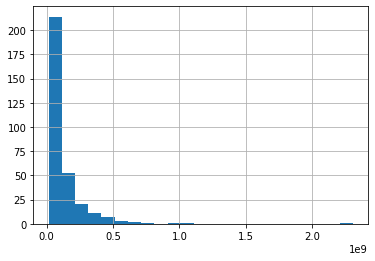

In [97]:
df.loc[df['budget'] == 0, 'budget'] = np.nan
df['budget'].hist(bins = 23)
df['budget'].describe()

Отлично, нулевых значений в `budget` больше нет. Гистограмма все еще выглядит хорошо. Рассмотрим теперь столбцы `refundable_support` и `nonrefundable_support`.

count           331.0
mean     11,598,187.3
std      24,476,640.2
min               0.0
25%               0.0
50%               0.0
75%      15,000,000.0
max     180,000,000.0
Name: refundable_support, dtype: float64

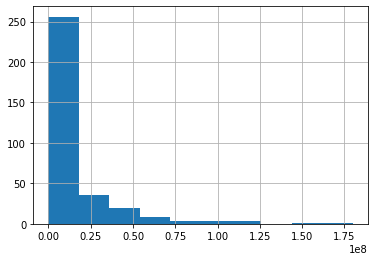

<AxesSubplot:>

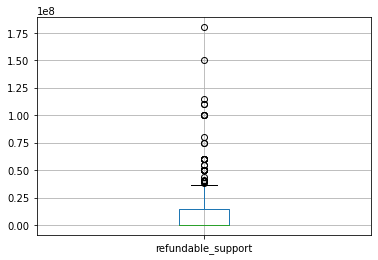

In [98]:
display(df['refundable_support'].describe())
df['refundable_support'].hist()
plt.show()
df.boxplot(column = 'refundable_support')

В `refundable_support` очень много нулевых значений, и первый и второй квантиль соответствуют 0. Но большое количество 0 в этом столбце вполне нормально. Менять ничего не надо.

Аналогично для `nonrefundable_support`.

count           331.0
mean     47,920,508.5
std      56,868,370.6
min               0.0
25%      25,000,000.0
50%      30,000,000.0
75%      40,000,000.0
max     400,000,000.0
Name: nonrefundable_support, dtype: float64

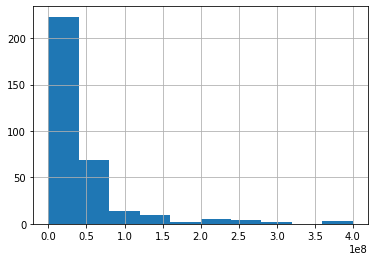

<AxesSubplot:>

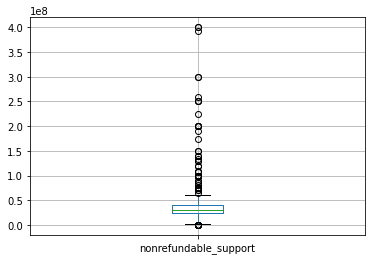

In [99]:
display(df['nonrefundable_support'].describe())
df['nonrefundable_support'].hist()
plt.show()
df.boxplot(column = 'nonrefundable_support')

Графики выглядят хорошо, ничего странного. Как и с `budget`, `refundable_support` есть выбросы, но они, вероятнее всего, не являются ошибками.

Посмотрим теперь, как эти значения связаны между собой.

In [100]:
df_budget_corr = df[['budget', 'refundable_support', 'nonrefundable_support']]
df_budget_corr.corr()

,budget,refundable_support,nonrefundable_support
budget,1.0,0.7,0.6
refundable_support,0.7,1.0,0.3
nonrefundable_support,0.6,0.3,1.0


Проверим, что сумма государственной поддержки бюджет фильма.

In [101]:
df[df['budget'] < df['refundable_support'] + df['nonrefundable_support']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b> Некоторые замечания и рекомендации</b>🔎:
    
Предлагаю проверить, не превышает ли где-то сумма государственной поддержки бюджет фильма (по идее, гос поддержка уже включена в бюджет).
    
    df[df['budget'] < df['refundable_support'] + df['nonrefundable_support']]

<div class="alert alert-block alert-info">Проверила</div>

Между `budget` (бюджет) и `refundable_support` (объём возвратных средств государственной поддержки) средняя корреляция. Как и между `budget` и `nonrefundable_support`. То есть бюджет не зависит полностью от государственной поддержки (возвратной или нет), но связь есть.

Осталось исследовать столбцы `box_office` (сборы в рублях) и `ratings` (рейтинг фильма на КиноПоиске).

count           3,128.0
mean       77,211,876.0
std       241,386,107.3
min                 0.0
25%           103,142.5
50%         2,423,534.0
75%        24,677,099.0
max     3,073,568,691.0
Name: box_office, dtype: float64

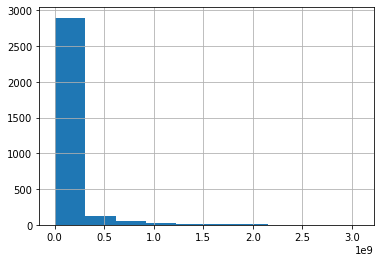

<AxesSubplot:>

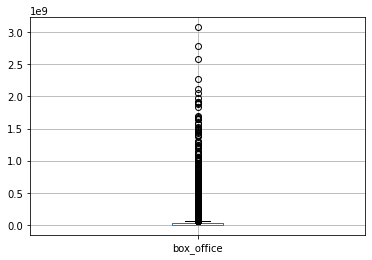

In [102]:
display(df['box_office'].describe())
df['box_office'].hist()
plt.show()
df.boxplot(column = 'box_office')

Аналогично с бюджетом, в `box_office` есть нулевые значения. Но мы не будем заменять их на Nan. Для исследования нам будет важно знать, есть ли хоть какие-то значения в столбце. Придется просто запомнить, что в столбце есть подозрительные нулевые значения.

Здесь тоже очень много выбросов. Но мы исследуем сборы фильмов, тем более российских и зарубежных вместе взятых. Так что такой разброс значений допустим.

Остался последний столбец `ratings`.

count   5,813.0
mean        6.5
std         1.1
min         1.0
25%         5.8
50%         6.6
75%         7.2
max         9.9
Name: ratings, dtype: float64


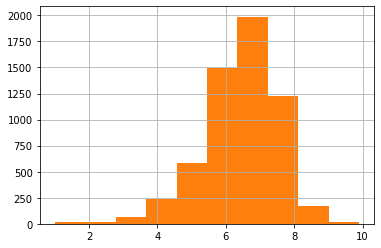

<AxesSubplot:>

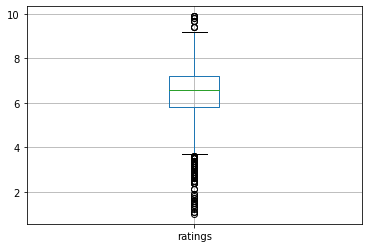

In [103]:
print(df['ratings'].describe())
df['ratings'].hist()
plt.hist(df['ratings'])
plt.show()
df.boxplot(column = 'ratings')

График выглядит совсем хорошо - нормальное распределение. Средний рейтинг - 6.5.

Странно только, что он доходит до значений 9.9. Даже если это ошибка, таких значений очень немного, пока оставим.

Добавим новые столбцы:
* `show_start_year` - год проката
* `director_name` - имя и фамилия главного режиссёра
* `main_genre` - основной жанр фильма
* `support_to_budget` - доля государственной поддержки от общего бюджета фильма 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [104]:
df['show_start_year'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category,show_start_year
7456,Холоп,111021719,2019-12-20,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.0","35,000,000.0","160,000,000.0",Фонд кино,6.8,комедия,"3,073,568,691.0",12,2019
5653,Движение вверх,111011817,2017-12-22,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,"400,000,000.0","590,192,191.0",Фонд кино,7.5,"спорт, драма","2,779,686,144.0",6,2017
6820,Мстители: Финал,121005519,2019-04-30,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.6,"фантастика, боевик, драма","2,576,613,777.0",16,2019
6549,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.0","120,000,000.0","563,784,717.0",Фонд кино,6.5,"драма, военный, боевик","2,271,754,005.0",12,2018
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-18,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,6.6,"фэнтези, боевик, комедия","2,118,396,119.0",16,2017


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Сейчас в столбцах с жанром и именами режиссеров несколько значений хранятся в одной строке, перечисленные через запятую с пробелом. Эти разделители одинаковые во всех ячейках, мы это предусмотрели выше. Теперь поменяем формат ячейки, пусть жанры (и режиссеры) будут храниться не в одной строке, а в массиве. Каждому элементу массива будет соответствовать один жанр (режиссер).

Создадим функцию, которая сделает из строки массив и вернет первый элемент.

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  Все отлично!</b> 🏆: 
   
Приятные бонусы правильной предобработки данных. 
    
    
</div>

In [105]:
def srt_to_list(string):
    return string.split(', ')[0]

df['director_name'] = df['director'].apply(srt_to_list)
df['main_genre'] = df['genres'].apply(srt_to_list)

df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_restriction_category,show_start_year,director_name,main_genre
4109,Буги-вуги.,121019510,2010-10-28,Художественный,"Аутономус, Колорфрейм, Констанс Медиа, Файерфл...",Великобритания,Дункан Уорд,"Дэнни Мойнихэн, Ками Нахди, Кристофер Саймон",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,5.6,"драма, мелодрама, комедия",NaN,16,2010,Дункан Уорд,драма
7333,Волшебный лес,124008719,2019-11-08,Анимационный,"Педри Анимейшнз, Квистен Анимейшенз, Стимчедс ...",Норвегия - Нидерланды,Расмус А.Сивертсен,"Ове Хайборг, Элизабет Опдаль, Эрик Смидесанг С...",«6+» - для детей старше 6 лет,NaN,NaN,NaN,no_support,7.4,"мультфильм, фэнтези, драма",NaN,6,2019,Расмус А.Сивертсен,мультфильм
919,Девушка и смерть,121010113,2013-04-11,Художественный,"Йос Стеллинг Филмс Би Ви, Ма Жа Дэ Фикшн ГмбХ,...",Нидерланды - Россия - Германия,Йос Стеллинг,"Евгений Гиндилис, Хайно Декерт, Йос Стеллинг",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.1,"триллер, драма","4,400.0",16,2013,Йос Стеллинг,триллер
3892,2012,221082310,2010-07-16,Художественный,"Центрополис Интертейнмент, Коламбиа Пикчерз, Ф...",США,Роланд Эммерих,"Харальд Клозер, Лари Джей Франко, Роланд Эммерих",«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,6.9,"фантастика, приключения, боевик",NaN,16,2010,Роланд Эммерих,фантастика
3829,"Тринадцатый воин /По роману Майкла Крайтона ""П...",221031410,2010-02-18,Художественный,"Тачстоун Пикчерз, Буена Виста Интернэшнл, Крич...",США,"Джон МкТиран, Майкл Крайтон",Нед Дауд,«16+» - для детей старше 16 лет,NaN,NaN,NaN,no_support,7.5,"боевик, приключения, детектив",NaN,16,2010,Джон МкТиран,боевик


С помощью созданной функции мы корректно выделили главного режиссера и главный жанр в отдельный столбцы `director_name` и `main_genre`.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [106]:
df['government_support'] = round(((df['refundable_support'] + df['nonrefundable_support']) / df['budget']), 2)

df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,age_restriction_category,show_start_year,director_name,main_genre,government_support
7456,Холоп,111021719,2019-12-20,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.0",...,"160,000,000.0",Фонд кино,6.8,комедия,"3,073,568,691.0",12,2019,К.Шипенко,комедия,0.4
5653,Движение вверх,111011817,2017-12-22,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,"590,192,191.0",Фонд кино,7.5,"спорт, драма","2,779,686,144.0",6,2017,А.Мегердичев,спорт,0.7
6820,Мстители: Финал,121005519,2019-04-30,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,...,NaN,no_support,7.6,"фантастика, боевик, драма","2,576,613,777.0",16,2019,Джо Руссо,фантастика,NaN
6549,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.0",...,"563,784,717.0",Фонд кино,6.5,"драма, военный, боевик","2,271,754,005.0",12,2018,А.Сидоров,драма,0.3
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-18,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,NaN,...,NaN,no_support,6.6,"фэнтези, боевик, комедия","2,118,396,119.0",16,2017,Йоаким Реннинг,фэнтези,NaN
2859,Зверополис,124000316,2016-02-15,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,8.3,"мультфильм, комедия, криминал","2,048,126,108.0",6,2016,Рич Мур,мультфильм,NaN
3755,Тайная жизнь домашних животных. Миньоны против...,124002816,2016-07-06,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,Крис Рено,Кристофер Меледандри,«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,6.7,"мультфильм, короткометражка, комедия","1,971,005,085.0",6,2016,Крис Рено,мультфильм,NaN
6274,Веном,121022018,2018-10-04,Художественный,"Коламбиа Пикчерз, Марвел Интертейнмент, Паскал...",США,Рубен Флейшер,"Ави Арад, Эми Паскаль, Мэтт Толмак",«16+» - для детей старше 16 лет,NaN,...,NaN,no_support,6.8,"боевик, фантастика, триллер","1,913,257,923.0",16,2018,Рубен Флейшер,боевик,NaN
7216,Малефисента: Владычица тьмы,121026219,2019-10-05,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,6.9,"фэнтези, приключения, семейный","1,911,944,866.0",6,2019,Йоаким Роннинг,фэнтези,NaN
7258,Джокер,121027519,2019-10-03,Художественный,"Брон Студиос, Ди Си Комикс, Джоинт Эффорт, Вил...",США - Канада,Тодд Филлипс,"Брэдли Купер, Эмма Тиллинджер Коскофф, Тодд Фи...",«18+» - запрещено для детей,NaN,...,NaN,no_support,8.0,"триллер, драма, криминал","1,890,368,076.0",18,2019,Тодд Филлипс,триллер,NaN


Создали и корректно заполнили столбец `government_support` - доля государственной поддержки от общего бюджета фильма.

Мы закончили предобработку данных: 
* Заполнили пропуски в данных там, где это возможно
* Преобразовали типы данных в столбцах, где это логично
* Устранили явные и неявные дубликаты
* Отметили странные значения в столбцах. Которые получилось исправить, исправили, другие просто запомнили, что они есть
* Создали новые столбцы: `show_start_year` (год проката), `director_name` (имя главного режиссера), `main_genre` (основной жанр фильма), `support_to_budget` (доля государственной поддержки от общего бюджета фильма).

<div class="alert alert-danger">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>
    
<b> 2 На доработку</b>🤔: 
    
Забыт иморт библиотеки.
    
Можно проверить превышает ли где-то сумма государственной поддержки бюджет фильма.

В остальном все корректно, отличная предобработка.

<div class="alert alert-block alert-info">Добавила, проверила</div>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Не для всех фильмов известны данные о прокате в кинотеатре. Еще раз, в самом начале мы объединили две исходные таблицы в одну:
* mkrf_movies - данные о прокатных удостоверениях
* mkrf_shows - данные о прокате в российских кинотеатрах

Данные о прокатах в кинотеатре мы взяли из второй таблицы. Значит показатель того, что для фильм был в прокате - у него заполнен столбец `box_office`.

<AxesSubplot:>

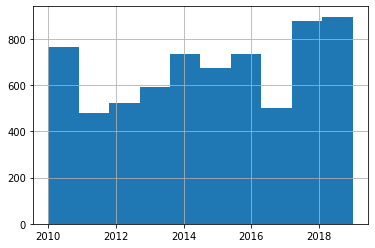

In [107]:
df['show_start_year'].hist(bins = 10)

In [108]:
df.pivot_table(index = 'show_start_year', aggfunc='count', values = 'box_office')

,box_office
show_start_year,
2010,101
2011,106
2012,127
2013,184
2014,275
2015,462
2016,513
2017,357
2018,475


Резкий скачок увеличения был в 2015 году. А вот в 2017-2018 наблюдался спад в количестве прокатных фильмов. Больше всего прокатных фильмов в 2019 году.

Посчитаем долю фильмов с указанной информацией о прокате ко всем фильмам.

In [109]:
display(round((df[df['box_office'].isna() == False]['box_office'].count() / df.shape[0]), 2))

0.46

Фильмы с указанной информацией о прокате в кинотеатрах составляют 46%. Посмотрим, как эта доля менялась по годам. 

In [110]:
def fraction(year):
    return round((df[(df['box_office'].isna() == False) & (df['show_start_year'] == year)]['box_office'].count() / df[df['show_start_year'] == year].shape[0]), 2)

df.groupby('show_start_year')['show_start_year'].first().apply(fraction)

show_start_year
2010   0.1
2011   0.2
2012   0.2
2013   0.3
2014   0.4
2015   0.7
2016   0.7
2017   0.7
2018   0.5
2019   0.6
Name: show_start_year, dtype: float64

В целом доля фильмов с известным прокатом увеличивалась, кроме 2018 года, когда она сильно просела. Полнее всего представлен период 2015 - 2016 года.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:xlabel='show_start_year'>

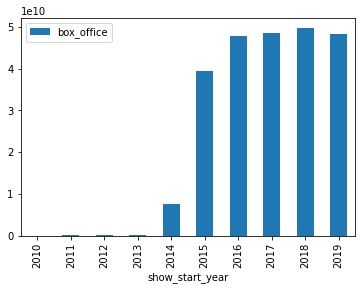

In [111]:
df.pivot_table(index = 'show_start_year', aggfunc='sum', values = 'box_office').plot(y ='box_office', kind = 'bar')

In [112]:
df.pivot_table(index = 'show_start_year', aggfunc='sum', values = 'box_office')

,box_office
show_start_year,
2010,"2,426,054.0"
2011,"14,041,290.0"
2012,"6,954,873.0"
2013,"29,797,438.0"
2014,"7,444,935,317.0"
2015,"39,497,361,810.0"
2016,"47,866,051,070.0"
2017,"48,563,707,218.0"
2018,"49,668,403,134.0"


Максимальная сумма сборов была в 2018 году. Минимальная в 2010 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Мы помним, что у нас есть нулевые значения в столбце `box_office`. Учтем это.

In [113]:
df[df['box_office'] > 0].pivot_table(index = 'show_start_year', aggfunc= ['sum', 'mean', 'median'], values = 'box_office')

,sum,mean,median
,box_office,box_office,box_office
show_start_year,,,
2010,"2,426,054.0","25,010.9","1,916.0"
2011,"14,041,290.0","132,465.0","2,952.5"
2012,"6,954,873.0","57,007.2","6,437.5"
2013,"29,797,438.0","166,466.1","3,580.0"
2014,"7,444,935,317.0","27,676,339.5","22,660.0"
2015,"39,497,361,810.0","86,050,897.2","5,175,580.0"
2016,"47,866,051,070.0","93,488,381.0","4,505,723.0"
2017,"48,563,707,218.0","136,032,793.3","9,968,340.0"


Средние значения суммы сборов на порядок больше медианных. Мы уже отмечали, что в столбце очень много выбросов. И что это нормально, у нас в таблице данные и о "средних" фильмах со средним бюджетом, и о блокбастерах, с очень большими сборами.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='age_restriction_category'>

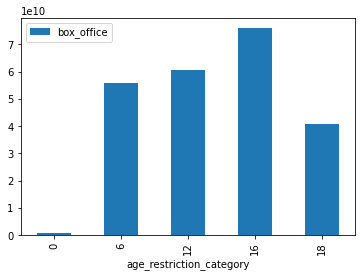

In [114]:
df[df['show_start_year'] >= 2015].pivot_table(index = 'age_restriction_category', aggfunc='sum', values = 'box_office').plot(y ='box_office', kind = 'bar')

In [115]:
display(df[df['show_start_year'] >= 2015].pivot_table(index = 'age_restriction_category', aggfunc= ['sum'], values = 'box_office'))
df[df['show_start_year'] >= 2015].pivot_table(index = 'show_start_year', columns='age_restriction_category', aggfunc= ['sum', 'count'], values = 'box_office')

,sum
,box_office
age_restriction_category,
0,"809,030,399.0"
6,"55,798,606,801.0"
12,"60,618,958,267.0"
16,"76,034,562,059.0"
18,"40,759,435,623.0"


sum                                    \
age_restriction_category            0                6                12   
show_start_year                                                            
2015                     379,053,100.0  8,701,799,371.0 13,616,082,007.0   
2016                     150,183,301.0 12,053,142,011.0 12,204,422,026.0   
2017                     229,598,930.0 12,086,142,146.0  7,851,427,661.0   
2018                      32,449,002.0 10,104,974,625.0 14,267,291,657.0   
2019                      17,746,066.0 12,852,548,648.0 12,679,734,916.0   

                                                           count               \
age_restriction_category               16               18    0   6   12   16   
show_start_year                                                                 
2015                     11,368,118,967.0  5,432,308,365.0    37  53  73  167   
2016                     16,664,378,857.0  6,793,924,875.0    39  66  81  178   
2017                     18,745,042,900.0  9,651,495,581.0     3  45  41  121   
2018                     16,503,602,350.0  8,760,085,500.0     5  68  67  156   
2019                     12,753,418,985.0 10,121,621,302.0     3  81  84  178   

                               
age_restriction_category   18  
show_start_year                
2015                      132  
2016                      149  
2017                      147  
2018                      179  
2019                      182

In [116]:
df['age_restriction_category'].value_counts()

16    2509
12    1478
18    1432
0      749
6      603
Name: age_restriction_category, dtype: int64

In [117]:
display(df[df['show_start_year'] == 2015].sort_values(by = 'box_office', ascending = False).head(7))
df[df['show_start_year'] == 2019].sort_values(by = 'box_office', ascending = False).head(7)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,age_restriction_category,show_start_year,director_name,main_genre,government_support
3117,Звёздные войны: Пробуждение силы,121024915,2015-12-11,Художественный,"Лукасфилм, Бэд Робот, Трунорт Продакшнз",США,Джей Джей Абрамс,"Джей Джей Абрамс, Брайан Берк, Кэтлин Кеннеди",«12+» - для детей старше 12 лет,NaN,...,NaN,no_support,7.1,"фантастика, боевик, приключения","1,658,861,426.0",12,2015,Джей Джей Абрамс,фантастика,NaN
2578,Миньоны,124001715,2015-03-30,Анимационный,Иллюминейшн Интертейнмент,США,"Кайл Балда, Пьер Соффин","Кристофер Меледандри, Джанет Хили",«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,6.2,"мультфильм, фантастика, комедия","1,646,580,646.0",6,2015,Кайл Балда,мультфильм,NaN
2159,Мстители: Эра Альтрона,121007215,2015-04-03,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,«12+» - для детей старше 12 лет,NaN,...,NaN,no_support,7.2,"фантастика, боевик, приключения","1,500,989,282.0",12,2015,Джосс Уидон,фантастика,NaN
2105,Форсаж 7,121001215,2015-01-27,Художественный,"Юниверсал Пикчерз, Релятивити Медиа, Дентсу, Ф...",США,Джеймс Ван,"Вин Дизель, Майкл Фоттрел",«16+» - для детей старше 16 лет,NaN,...,NaN,no_support,7.0,"боевик, триллер, приключения","1,486,131,019.0",16,2015,Джеймс Ван,боевик,NaN
2579,Мир Юрского периода,121006515,2015-04-03,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",«12+» - для детей старше 12 лет,NaN,...,NaN,no_support,6.9,"фантастика, приключения, боевик","1,211,158,990.0",12,2015,Колин Треворроу,фантастика,NaN
2509,Терминатор: Генезис,121012415,2015-06-12,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",«12+» - для детей старше 12 лет,NaN,...,NaN,no_support,6.4,"фантастика, боевик, триллер","1,060,054,283.0",12,2015,Алан Тэйлор,фантастика,NaN
3172,Выживший (2015),121026215,2015-12-31,Художественный,"Нью Ридженси Пикчерз, Анонимус Контент, Аппиан...",США,Алехандро Гонсалес Иньярриту,"Стив Голин, Алехандро Гонсалес Иньярриту, Дэви...",«18+» - запрещено для детей,NaN,...,NaN,no_support,7.8,"приключения, вестерн, боевик","1,006,737,153.0",18,2015,Алехандро Гонсалес Иньярриту,приключения,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,age_restriction_category,show_start_year,director_name,main_genre,government_support
7456,Холоп,111021719,2019-12-20,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.0",...,"160,000,000.0",Фонд кино,6.8,комедия,"3,073,568,691.0",12,2019,К.Шипенко,комедия,0.4
6820,Мстители: Финал,121005519,2019-04-30,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,...,NaN,no_support,7.6,"фантастика, боевик, драма","2,576,613,777.0",16,2019,Джо Руссо,фантастика,NaN
7216,Малефисента: Владычица тьмы,121026219,2019-10-05,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,6.9,"фэнтези, приключения, семейный","1,911,944,866.0",6,2019,Йоаким Роннинг,фэнтези,NaN
7258,Джокер,121027519,2019-10-03,Художественный,"Брон Студиос, Ди Си Комикс, Джоинт Эффорт, Вил...",США - Канада,Тодд Филлипс,"Брэдли Купер, Эмма Тиллинджер Коскофф, Тодд Фи...",«18+» - запрещено для детей,NaN,...,NaN,no_support,8.0,"триллер, драма, криминал","1,890,368,076.0",18,2019,Тодд Филлипс,триллер,NaN
7383,Холодное сердце II,124009619,2019-11-24,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерс",США,"Крис Бак, Дженнифер Ли",Питер Дел Вечо,«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,7.1,"мультфильм, мюзикл, фэнтези","1,827,244,673.0",6,2019,Крис Бак,мультфильм,NaN
6715,Как приручить дракона 3,124000719,2019-02-21,Анимационный,"ДримУоркс Анимейшн, Мэд Хаттер Интертейнмент",США,Дин ДеБлуа,"Бонни Арнольд, Брэд Льюис",«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,7.7,"мультфильм, фэнтези, боевик","1,689,540,830.0",6,2019,Дин ДеБлуа,мультфильм,NaN
6957,Тайная жизнь домашних животных 2,124003519,2019-05-26,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США-Франция-Япония,Крис Рено,Лиз-Мари Амар,«6+» - для детей старше 6 лет,NaN,...,NaN,no_support,6.8,"мультфильм, комедия, приключения","1,478,921,168.0",6,2019,Крис Рено,мультфильм,NaN


Больше всего сборов за 2015-2019 года суммарно у фильмов с возрастным ограничением 16+. 

Отдельно по годам:
* 2015 - больше всего сборов у фильмов с возрастным ограничением 12+
* 2019 - больше всего сборов у фильмов с возрастным ограничением 6+
* Остальные года - больше всего сборов у фильмов с возрастным ограничением 16+

Больше всего сборов у фильмов 16+, потому что это самое распространенное ограничение у фильмов.
Отличающиеся значениями в 2015 и 2019 годах объясняются выходом сразу нескольких блокбастеров с необычными ограничениями. Например, в 2019 году была премьера мультфильмов "Холодное сердце II", "Как приручить дракона 3" и "Тайная жизнь домашних животных 2".

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b> 3 Некоторые замечания и рекомендации</b>🔎:
    
Можно так-же построить боксплот - изучить поведение медианы и средней.
    

Можено дополнить все исследования графиками, где это не сделано, для наглядности.

<div class="alert alert-block alert-info">Дополнила графиками</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Посмотрим, как зависят сборы и рейтинг фильма от доли суммы государственной поддержки. Для исследования сборов создадим отдельный датафрейм, где известны сборы и бюджет.

<AxesSubplot:xlabel='all_support'>

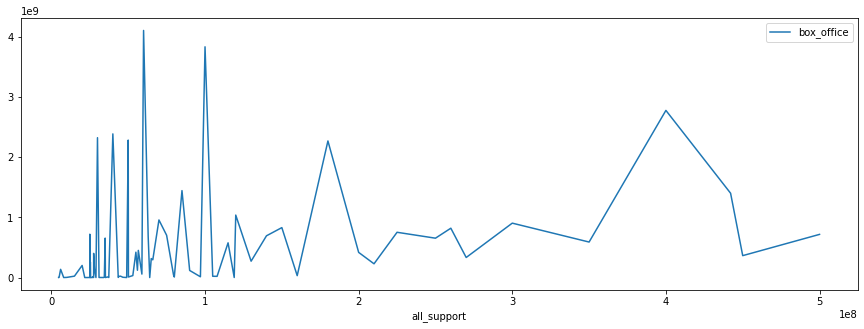

In [118]:
# создаем отдельный датафрейм
df_box_office = df[(df['box_office'] > 0) & (df['budget'] > 0)].copy()

# создаем столбец с общей суммой государственного финансирования
df_box_office['all_support'] = df_box_office['refundable_support'] + df_box_office['nonrefundable_support']

# график зависимости сборов от суммы государственного финансирования
(
    df_box_office.pivot_table(index = 'all_support', values='box_office', aggfunc='sum')
    .plot(figsize = (15, 5))
)

Нет четкой зависимости сборов от суммы государственной поддержки. Посчитаем окупаемость фильмов.

In [119]:
# булеый столбец с окупаемостью
df_box_office['payback'] = df['box_office'] >= df['budget']

display(round((df_box_office['payback'].mean() * 100), 0))

22.0

Так как значения `budget` у нас только для фильмов с государственным финансированием, окупаемость фильмов с государственным финансированием всего 22%.

Посмотрим на средний рейтинг фильмов с государственным финансированием.

In [120]:
round((df_box_office['ratings'].mean()), 1)

6.0

Средний рейтинг терпимый для российских фильмов.

Посмотрим зависимость окупаемости от суммы государственной поддержки. 

<AxesSubplot:xlabel='all_support'>

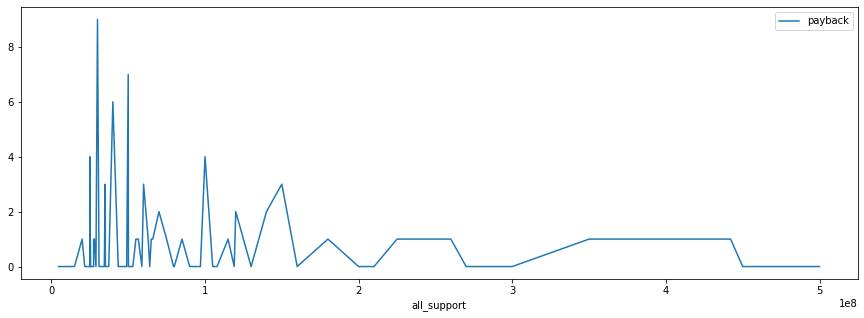

In [121]:
(
    df_box_office.pivot_table(index = 'all_support', values='payback', aggfunc='sum')
    .plot(figsize = (15, 5))
)

Посмотрим зависимость окупаемости от жанра, рейтинга, возрастного ограничения, года выхода, режиссера фильмов. 

<AxesSubplot:title={'center':'окупаемость от рейтинга'}, ylabel='ratings'>

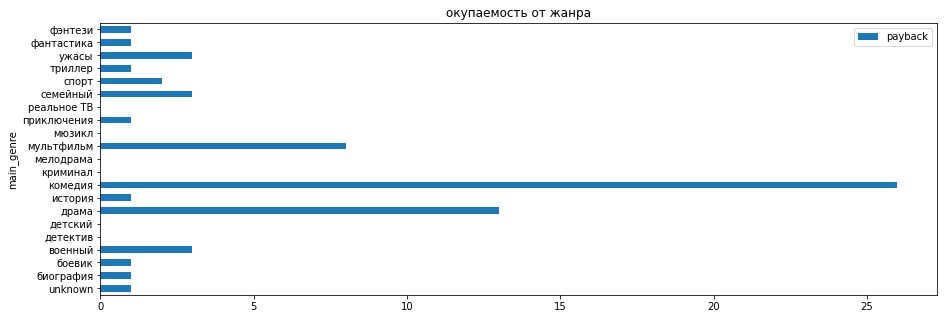

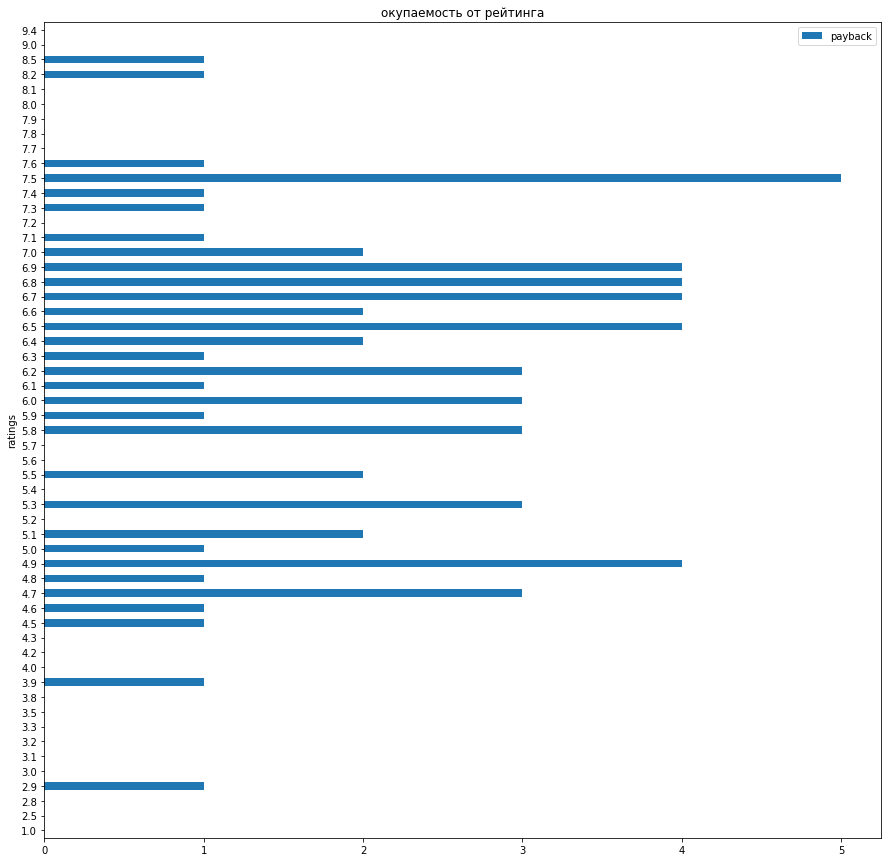

In [122]:
(
    df_box_office.pivot_table(index = 'main_genre', values='payback', aggfunc='sum')
    .plot(figsize = (15, 5), kind = 'barh', y = 'payback', title='окупаемость от жанра')
)

(
    df_box_office.pivot_table(index = 'ratings', values='payback', aggfunc='sum')
    .plot(figsize = (15, 15), kind = 'barh', y = 'payback', title='окупаемость от рейтинга')
)

<AxesSubplot:title={'center':'окупаемость от года выхода'}, ylabel='show_start_year'>

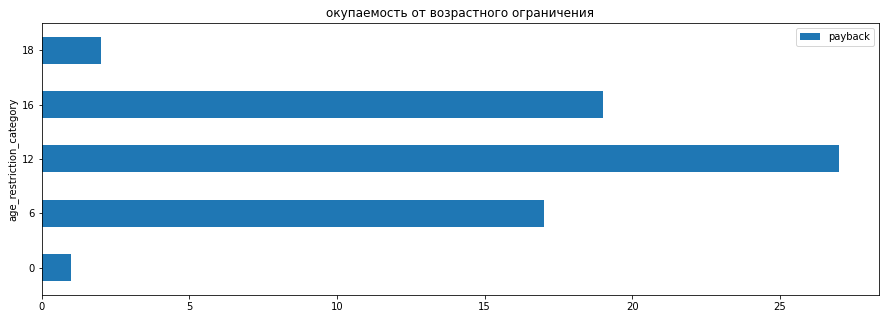

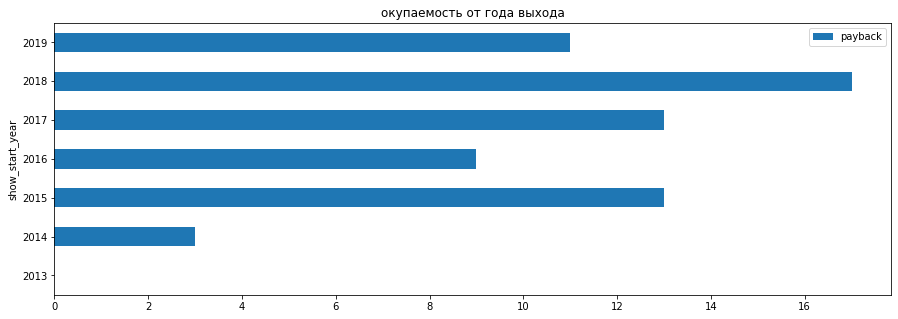

In [123]:
    
(
    df_box_office.pivot_table(index = 'age_restriction_category', values='payback', aggfunc='sum')
    .plot(figsize = (15, 5), kind = 'barh', y = 'payback', title='окупаемость от возрастного ограничения')
)
    
(
    df_box_office.pivot_table(index = 'show_start_year', values='payback', aggfunc='sum')
    .plot(figsize = (15, 5), kind = 'barh', y = 'payback', title='окупаемость от года выхода')
)

* Самый окупаемый жанр - комедия. 
* Лучше всего окупаются фильмы с возрастным ограничением 12+.
* Самый окупаемый год был 2018.
* А вот окупаемость от рейтинга фильма зависит не так явно. 

Еще раз, речь идет про российские фильмы с государственным финансированием.

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  4 Все отлично!</b> 🏆: 

Исследование развернутое, наглядное, выводы корректны.
    
    
</div>

### Шаг 5. Напишите общий вывод

0. Мы предобработали данные


1. Мы исследовали основные показатели:
* Есть средняя корреляция между бюджетом фильма и средствами государственной поддержки
* Данные о прокате в России известны для 46% фильмов в таблице
* Максимальная сумма сборов была в 2018 году. Минимальная в 2010 году
* Больше всего сборов за 2015-2019 года суммарно у фильмов с возрастным ограничением 16+
* В некоторые года больше всего сборы у фильмов с ограничениями 12+ и 6+. Это связано с тем, что в эти года выпустили много блокбастеров для этих возрастных категорий

2. Исследовали фильмы с государственной поддержкой:
* Окупаемость фильмов с государственным финансированием 22%
* Средний рейтинг фильмов с государственным финансированием 6.0. Почти как для остальных фильмов, для которых 6.4
* Самый окупаемый жанр - комедия
* Лучше всего окупаются фильмы с возрастным ограничением 12+
* Самым окупаемым годом был 2018
* А вот окупаемость от рейтинга фильма зависит не явно

<br/>
    
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>  Все отлично!</b> 🏆: 

Вывод развернутый, все по полочкам.
    
Не забудь дополнить его после просмотра рекомендаций.
    
    
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>Общий вывод по проекту <a class="tocSkip"></h2>

Cпасибо за твой проект! Было приложено много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях. 

**Отмечу отдельные положительные моменты проекта🙂**:
 
* Работа на высшем уровне, просто великолепно. Ознакомься с рекомендациями, что прокачиваться дальше)


**На что стоит обратить внимание🤓**:
    
* не забывай перезапускать весь код перед завершением работы, забыта одна библиотека
* можно привести экспоненциальный формат отображения данных в более удобный
* проверь превышает ли где-то сумма государственной поддержки бюджет фильма
* стоит обагатить исследования графиками.


**Желаю удачи и жду твой проект на повторное ревью!**
    
**PS! Работа и вправду отличная**
    
![gif](https://media1.giphy.com/media/111ebonMs90YLu/giphy.gif?cid=ecf05e47squ85946qbqcaht8169a29teug2h55iz61x9l1k8&rid=giphy.gif&ct=g)